In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data
data = {
'production_cost': [10200, 15300, 20150, 25200, 30250, 35300, 40350, 45400, 50450, 55500,
                    12500, 16500, 21500, 26500, 31500, 36500, 41500, 46500, 51500, 56500,
                    13500, 17500, 22500, 27500, 32500, 37500, 42500, 47500, 52500, 57500,
                    14500, 18500, 23500, 28500, 33500],
'market_price': [17400, 25500, 33000, 38500, 42000, 46500, 49000, 55000, 58000, 61500,
                 18500, 27000, 34000, 40000, 43500, 48000, 50500, 56500, 59000, 62500,
                 19500, 28000, 35000, 41000, 44500, 49000, 51500, 57500, 60000, 63500,
                 20500, 29000, 36000, 42000, 45500]
}

# DataFrame
df = pd.DataFrame(data)

# Variables
X = df[['production_cost']]
y = df['market_price']

# Train and Test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Performance
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# New predict
new_production_cost = pd.DataFrame({'production_cost': [35000]})
predicted_market_price = model.predict(new_production_cost)

# Performance dataframe
result_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R^2 Score', 'Predicted Market Price (for 35000)'],
    'Value': [round(mse, 2).astype(int), round(r2, 2), round(predicted_market_price[0], 2).astype(int)]
})

# Combine
train_df = pd.DataFrame({
    'production_cost': X_train['production_cost'],
    'actual': y_train,
    'predicted': np.round(y_train_pred, 0).astype(int),
    'Set': 'Train'
})

test_df = pd.DataFrame({
    'production_cost': X_test['production_cost'],
    'actual': y_test,
    'predicted': np.round(y_test_pred, 0).astype(int), 
    'Set': 'Test'
})

print("Performance Results:")
print(result_df)

print("__________________________________")

print("Training Results:")
print(train_df)

print("__________________________________")

print("Test Results:")
print(test_df)


Performance Results:
                               Metric       Value
0                  Mean Squared Error  5766958.00
1                           R^2 Score        0.96
2  Predicted Market Price (for 35000)    44937.00
__________________________________
Training Results:
    production_cost  actual  predicted    Set
12            21500   34000      31809  Train
8             50450   58000      59962  Train
16            41500   50500      51258  Train
9             55500   61500      64873  Train
33            28500   42000      38616  Train
0             10200   17400      20820  Train
4             30250   42000      40318  Train
17            46500   56500      56121  Train
27            47500   57500      57093  Train
5             35300   46500      45229  Train
11            16500   27000      26947  Train
1             15300   25500      25780  Train
2             20150   33000      30496  Train
32            23500   36000      33754  Train
3             25200   38500      354

Text(0.5, 1.0, 'General data')

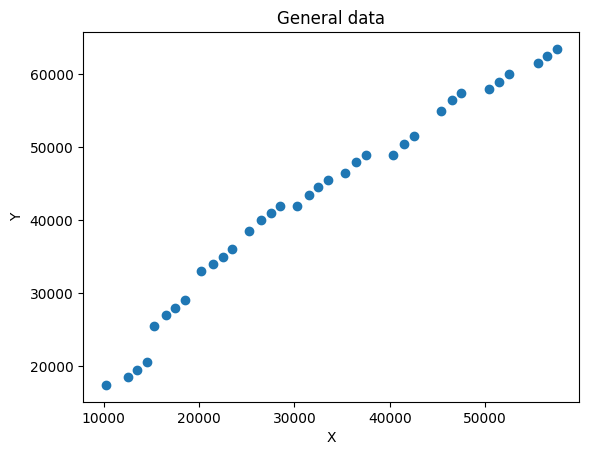

In [42]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('General data')

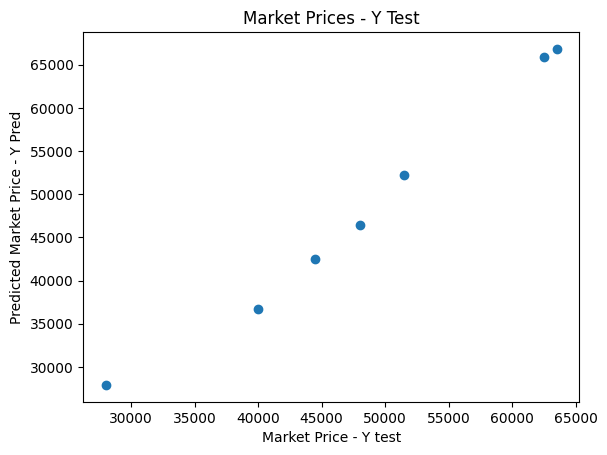

In [43]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Market Price - Y test')
plt.ylabel('Predicted Market Price - Y Pred')
plt.title('Market Prices - Y Test')
plt.show()

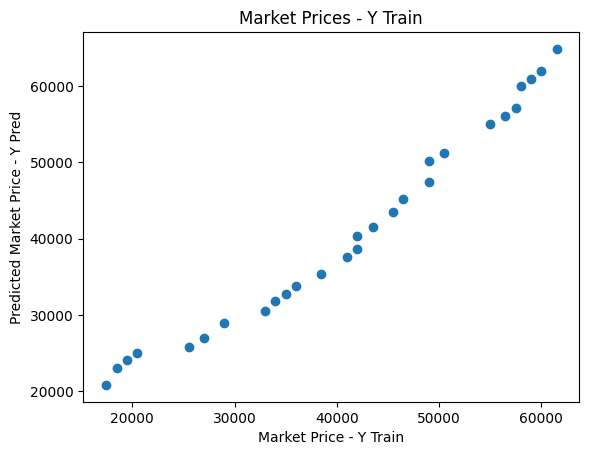

In [44]:

plt.scatter(y_train, y_train_pred)
plt.xlabel('Market Price - Y Train')
plt.ylabel('Predicted Market Price - Y Pred')
plt.title('Market Prices - Y Train')
plt.show()

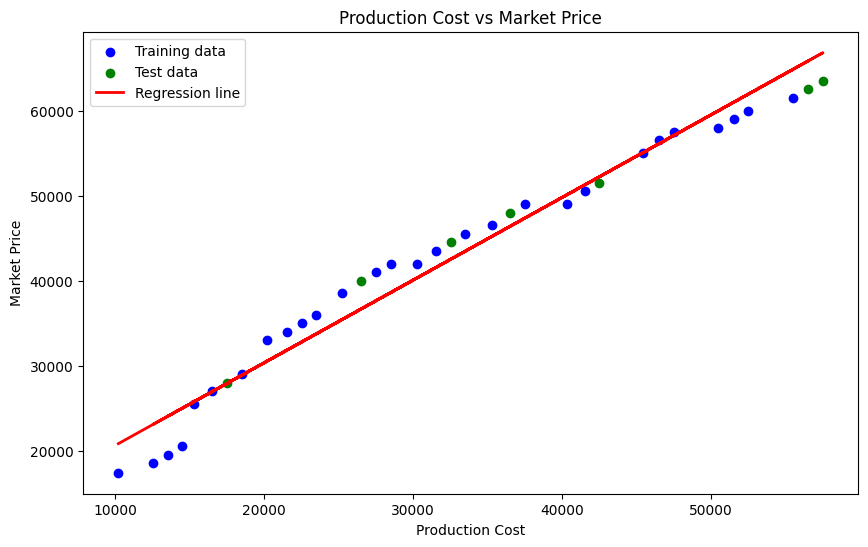

In [47]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')

plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')

plt.title('Production Cost vs Market Price')
plt.xlabel('Production Cost')
plt.ylabel('Market Price')
plt.legend()
plt.show()